# Projekt z Pythona Rylova Sofiya

**1. dane** 

Moje dane pochodzą ze strony internatowej Kaggle.com, na której można znalezć datasety dla uczenia maszynowego i samodzielnego przerobiania analizy tych danych. Mój zbór danych to "Udemy courses Analysis", w kórym można znależć kilka zmiennych:

1. price - cena za dany kurs internetowy na danej stronie
2. num_subscribes - liczba obserwujących dany kurs
3. num_reviews - liczba recenzji na kurs 
4. num_lectures - liczba lekcji w kursie
5. content_duration - trwanie kursu w godzinach


importujemy wszystkie potrzebne biblioteki:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
from scipy.stats import norm
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

Wczytamy nasz zbiór danych, usuniemy niepotrzebne columny, sprawdzimy czy wszystkie dane nie są "null" i wyświetlimy podstawowe informacje o naszym zbiorze danych:

In [ ]:
data = pd.read_csv("dane.csv")
data.info()
data = data.drop(['Unnamed: 0'], axis = 1)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3678 non-null   int64  
 1   price             3678 non-null   int64  
 2   num_subscribers   3678 non-null   int64  
 3   num_reviews       3678 non-null   int64  
 4   num_lectures      3678 non-null   int64  
 5   content_duration  3678 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 172.5 KB


price               0
num_subscribers     0
num_reviews         0
num_lectures        0
content_duration    0
dtype: int64

Sprawdzimy ile zbiór zawiera obserwacji i zmiennych:

In [ ]:
print('Zbiór zawiera {} obserwacji i {} zmiennych.'.format(data.shape[0], data.shape[1]))

Zbiór zawiera 3678 obserwacji i 5 zmiennych.


Wyświetlimy 5 pierwszych wierszy naszego zbioru danych:

In [ ]:
data[:5].style.set_properties(**{"background-color": "lavender","color": "black"})

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.500000
1,75,2792,923,274,39.000000
2,45,2174,74,51,2.500000
3,95,2451,11,36,3.000000
4,200,1276,45,26,2.000000


**2. podstawowe statystyki** 

Wyświetlimy podstawowe statystyki dla calego zbioru danych i przedstawimy je za pomocą tabelki:

In [ ]:
data.describe().style.set_properties(**{"background-color": "lightcyan","color": "black"})

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


Wyznaczenie współczynnika skośności rozkładu:

In [ ]:
data.agg(['mean', 'median'])
data.skew()

price                1.159141
num_subscribers     11.541417
num_reviews         17.816554
num_lectures         4.873677
content_duration     5.428022
dtype: float64

**3. badanie normalności rozkladu**

H0 = brak podstaw na odrzucenie hipotezy zerowej - przyjmuję, że zmienna pochodzi z rozkładu normalnego,

H1 = odrzucam hipotezę zerową - przyjmuję hipotezę alternatywn - zmienna nie pochodzi z rozkładu normalnego

In [ ]:
results = []
for feature in data.columns:
    alpha = 0.05
    p_value = scipy.stats.normaltest(data[feature])[1]
    results.append([feature, p_value])

In [ ]:
podsumowanie = pd.DataFrame(results)
podsumowanie.columns = ['nazwa_zmiennej', 'p_value']
podsumowanie.set_index('nazwa_zmiennej', inplace = True)
podsumowanie.sort_values('p_value', ascending = False, inplace = True)
podsumowanie

,p_value
nazwa_zmiennej,
price,7.048260e-119
num_subscribers,0.000000e+00
num_reviews,0.000000e+00
num_lectures,0.000000e+00
content_duration,0.000000e+00


Jak widzimy z tabeli przedstawionej poniżej, p-value jest bardzo male dla naszych zmiennych => Dla wszystkich zmiennych z mojego zbioru danych odrzucam H0=> nie pochodzą z rozkladu normalnego.

Również możemy zinterpretować wizualnie każdy wykres i zauważyć, że faktycznie, żadna zmienna nie pochodzi z rozkladu normalnego:

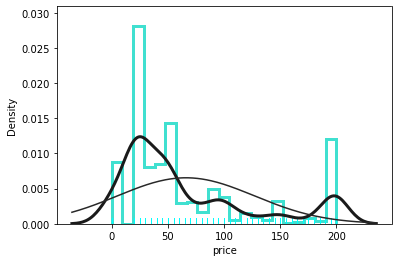

In [ ]:
norm_price = data.price
plot = sns.distplot(norm_price, fit = norm, rug=True, rug_kws={"color": "aqua"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "turquoise"})

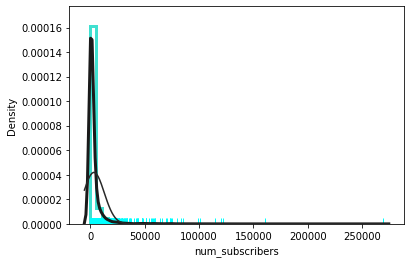

In [ ]:
norm_sub = data.num_subscribers
plot = sns.distplot(norm_sub, rug=True, fit = norm, rug_kws={"color": "aqua"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "turquoise"})

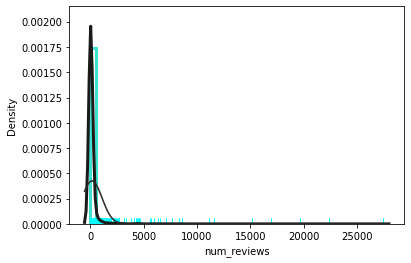

In [ ]:

norm_review = data.num_reviews
plot = sns.distplot(norm_review, fit = norm, rug=True, rug_kws={"color": "aqua"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "turquoise"})

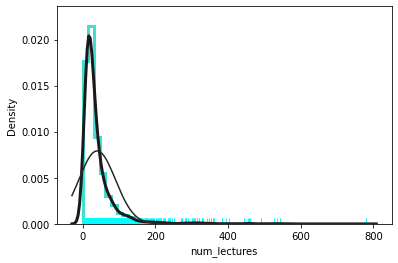

In [ ]:
norm_lectures = data.num_lectures
plot = sns.distplot(norm_lectures,fit = norm, rug=True, rug_kws={"color": "aqua"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "turquoise"})

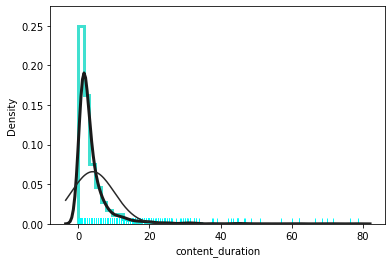

In [ ]:
norm_duration = data.content_duration
plot = sns.distplot(norm_duration,fit = norm, rug=True, rug_kws={"color": "aqua"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "turquoise"})

**4. wykresy** 

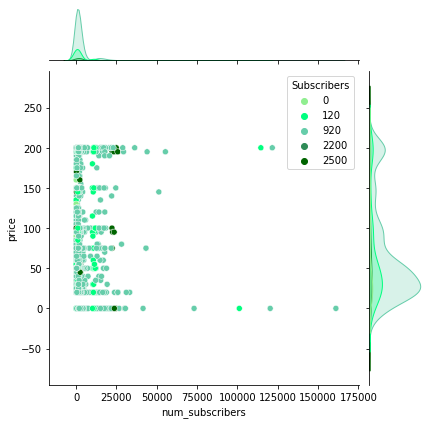

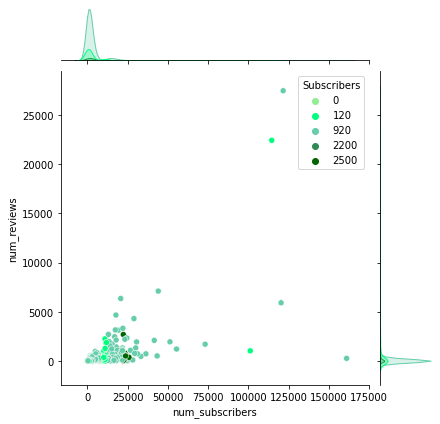

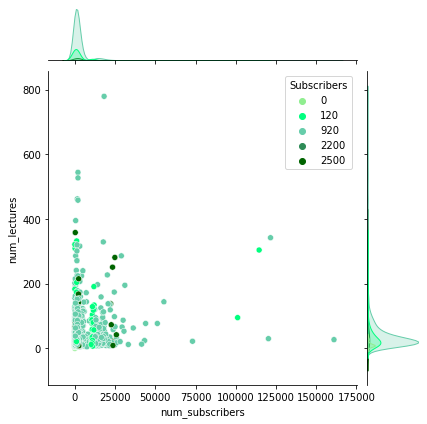

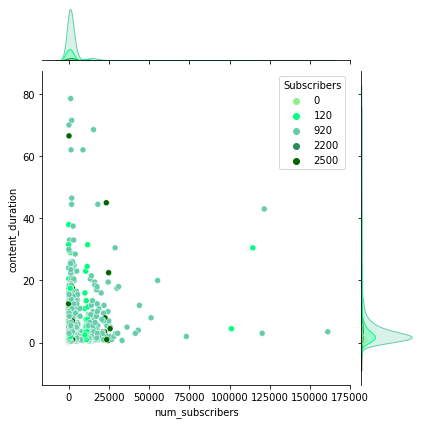

In [ ]:
bins = ['-1','0','120','920','2200','2600']
labels = ['0','120','920','2200','2500']
data["Subscribers"] = pd.cut(data["num_subscribers"], bins=bins, labels=labels)

hue_C = ["lightgreen", "springgreen", "mediumaquamarine", "seagreen", "darkgreen"]
zmienne = ["price","num_reviews","num_lectures","content_duration"]
for i in zmienne:
    sns.jointplot(x=data["num_subscribers"], y=data[i], hue=data["Subscribers"], palette = hue_C)
    plt.show()

**Opis danych za pomocą wykresów**:
 1. Na podstawie wykresu o cenie i liczbie obserwujacych możemy stwierdzić, że na dannej stronie internatowej "Kagge.com" możemy znalezc dla siebie sporo kursów za darmo, najbardziej popularna cena jednak bedzie 20-25$

 2. Wskaźnik recenzji jest bardzo niski, niezależnie od kursów.

 3. Widzimy, że ze wzrostem lekcji nie wzrasta liczba obserwujących, zwykle na kursie jest 20-40 lekcji i 600-700 obserwujących

 4. Zwykle kurs zawiera 2-5 godzin lekcji 

**Histogramy:**

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("ceny", "obserwujące",
                                                    "recenzje", "ilość lekcji",
                                                    "trwanie lekcji"))
x1 = data.price
x2 = data.num_subscribers
x3 = data.num_reviews
x4 = data.num_lectures
x5 = data.content_duration

ceny = go.Histogram(x = x1, name = "Ceny")
obserwujace = go.Histogram(x = x2, name = "Obserwujące")
recenzje = go.Histogram(x = x3, nbinsx=40, name = "Recenzje")
lekcje = go.Histogram(x = x4, name = "Ilość lekcji")
trwanie_lekcji = go.Histogram(x = x5, name = "Trwanie lekcji")
fig.append_trace(ceny, 1, 1)
fig.append_trace(obserwujace, 1, 2)
fig.append_trace(recenzje, 2, 1)
fig.append_trace(lekcje, 2, 2)
fig.append_trace(trwanie_lekcji, 3, 1)

fig.show()


**5. macierz correlacji**

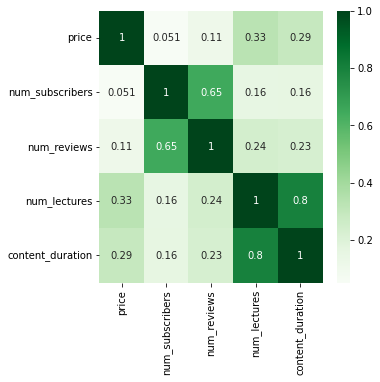

In [ ]:
corrmat= data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat, annot=True, cmap="Greens")

1. Z macierzy korelacji widzimy, że najbardziej skorelowane zmienne są dlugość lekcji i ilość lekcji(co jest bardzo logiczne) i liczba recenzji i liczba obserwajacych, co oczywiscie też będzie prawdą, bo ze wzrostem popularności kursu wzrasta i ilość komentarzy. 

2. Najmniej skorelowane liczba obserwujących i cena kursu, liczba recenzji i cena.

**6. regresja liniowa**

Metoda ta zakłada, że zależność między zmienną objaśniającą a objaśnianą jest zależnością liniową, dlatego funkcja regresji liniowej przyjmuje postać funkcji liniowej:
 *y  = bx+a*

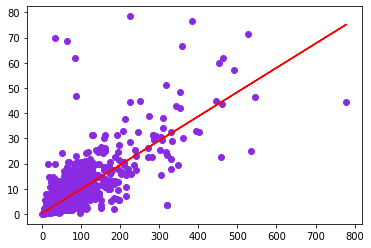

y = 0.23114657878185235 + 0.09632237131625326x


In [ ]:
reglinp = np.poly1d(np.polyfit(data['num_lectures'], data['content_duration'], 1))
plt.scatter(data['num_lectures'], data['content_duration'], color = 'blueviolet')
plt.plot(data['num_lectures'], reglinp(data['num_lectures']), c = "red")
plt.show()
print(f"y = {reglinp(0)} + {reglinp(1) - reglinp(0)}x")

num_lectures zmienna X, content_duration zmienna Y

Model liniowy: Y = 0.23 + 0.09X

Przy zerowej liczbie lekcji mamy 0.23 czas trwania, jesli zwiększamy liczbę lekcjii o 1 to zwiększa nam się czas trwania lekcji o 0.09

Obliczymy współczynnik Pearsona dla nasze danych:

In [ ]:
PKP = scipy.stats.pearsonr(data['num_lectures'], data['content_duration'])
PKP = np.round(PKP, decimals=5)
print(PKP)

[0.80165 0.     ]


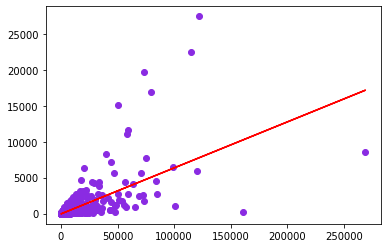

y = -48.26750111168996 + 0.06397152755383217x


In [ ]:
reglinp = np.poly1d(np.polyfit(data['num_subscribers'], data['num_reviews'], 1))
plt.scatter(data['num_subscribers'], data['num_reviews'], color = 'blueviolet')
plt.plot(data['num_subscribers'], reglinp(data['num_subscribers']), c = "red")
plt.show()
print(f"y = {reglinp(0)} + {reglinp(1) - reglinp(0)}x")

num_subscribers zmienna X, content_reviews zmienna Y

Model liniowy: Y = -48.26 + 0.06X

Przy zerowej liczbie followersów mamy -48.2 liczbę zecenzji, jesli zwiększamy liczbę followersów o 1 to zwiększa nam się liczba recenzji o 0.06

Obliczymy współczynnik Pearsona dla naszych zmiennych:

In [ ]:
PKP = scipy.stats.pearsonr(data['num_subscribers'], data['num_reviews'])
PKP = np.round(PKP, decimals=5)
print(PKP)

[0.64995 0.     ]
